# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from functools import reduce
from pathlib import Path
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results,mouse_metadata,on="Mouse ID")

# Display the data table for preview
mouse_study


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [46]:
# Checking the number of mice.
mice_count = mouse_study['Mouse ID'].nunique()
mice_count

249

In [47]:
#Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_dup = mouse_study[mouse_study.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
mouse_study_dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_no_duplicates = mouse_study.drop_duplicates(subset=['Mouse ID','Timepoint'])
mouse_no_dups_mid = mouse_study.drop_duplicates(subset=['Mouse ID'])
mouse_no_dups_mid

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [49]:
# Checking the number of mice in the clean DataFrame.
mice_count_nd = mouse_no_duplicates['Mouse ID'].nunique()
mice_count_nd

249

## Summary Statistics

In [51]:
mouse_no_duplicates


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_drug = mouse_no_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().reset_index(name='Mean Tumor Volume')
median_drug = mouse_no_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().reset_index(name='Median Tumor Volume')
var_drug = mouse_no_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().reset_index(name='Var Tumor Volume')
std_drug = mouse_no_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().reset_index(name='STD Tumor Volume')
sem_drug = mouse_no_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().reset_index(name='SEM Tumor Volume')
sem_drug
# Create a DataFrame called `per_school_summary` with columns for the calculations above.
drug_summary1 = [mean_drug,median_drug,var_drug,std_drug,sem_drug]
drug_summary = reduce(lambda left,right: pd.merge(left,right,on='Drug Regimen'),drug_summary1)
drug_summary

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Var Tumor Volume,STD Tumor Volume,SEM Tumor Volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [53]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
aggregation_func = { 'Tumor Volume (mm3)':['mean','median','var','std','sem']}
summary_drug = mouse_no_duplicates.groupby('Drug Regimen').agg(aggregation_func)
# Using the aggregation method, produce the same summary statistics in a single line
summary_drug

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

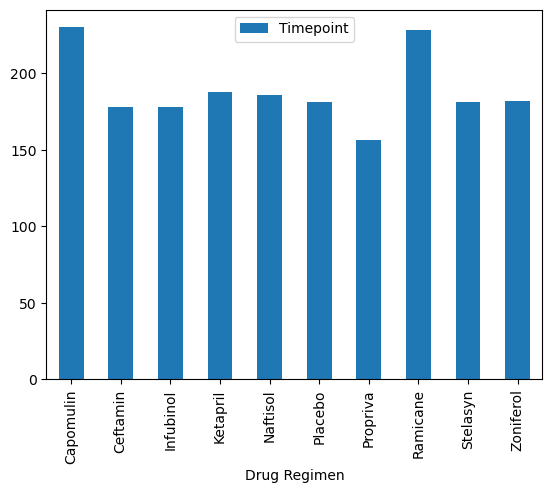

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#plt.plot(x_axis,points,marker='^',linestyle = '-')
plot_drug = mouse_no_duplicates.groupby('Drug Regimen')['Timepoint'].count().reset_index()
#x_values = mouse_no_duplicates['Drug Regimen']

#plt.plot(x_values,y_values)
plot_drug1=plot_drug.plot(kind="bar",x='Drug Regimen',y='Timepoint',rot = 90) 

plot_drug1

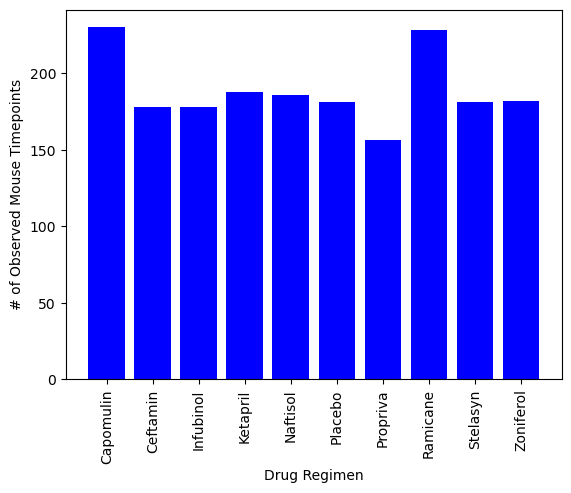

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#plt.bar(plot_drug['Drug Regimen'],plot_drug['Timepoint'],color ='blue')
fig, ax = plt.subplots()
#bars = ax.bar(plot_drug['Drug Regimen'],plot_drug['Timepoint'])
#bars[0].set_color('blue')
plt.bar(plot_drug['Drug Regimen'],plot_drug['Timepoint'],color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()


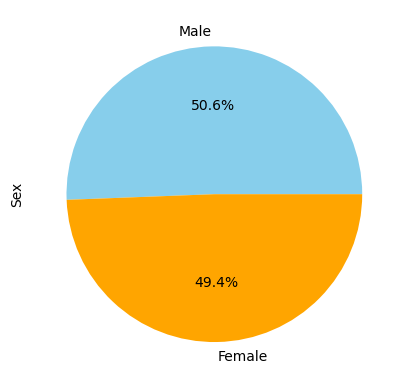

In [56]:
sex_data = mouse_study['Sex'].value_counts(normalize=True)*100
#sex_data 
sex_data.plot.pie(autopct='%1.1f%%',startangle=0,colors=['skyblue','orange'])
plt.ylabel('Sex')
plt.show()

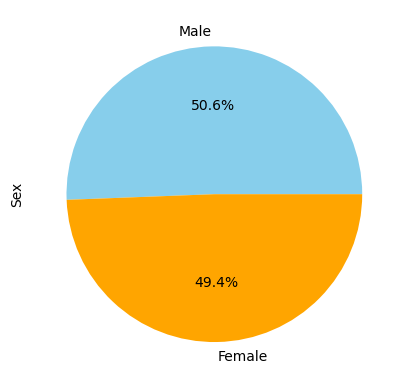

In [57]:
 #Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_data,labels=sex_data.index,autopct='%1.1f%%',startangle=0,colors=['skyblue','orange'])
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [58]:
 #output_file_path = Path("summary_no_dups.csv")
#mouse_no_duplicates.to_csv(output_file_path)
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse - A DF that has the last timepoint for each mouseid.
great_tp_mouse = mouse_no_duplicates.groupby('Mouse ID')['Timepoint'].max().reset_index(name='Timepoint')  #" Index is reset
great_tp_mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_drug_tp = pd.merge(great_tp_mouse,mouse_no_duplicates,on=['Mouse ID','Timepoint'],how = 'inner')
merge_drug_tp
#output_file_path = Path("summary_no_dups_d.csv")
#merge_drug_tp.to_csv(output_file_path)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
list_treat = {'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'} # "Four treatment groups put in separate list

# Create empty list to fill with tumor vol data (for plotting)
list_tumorvolume = ' ' #Empty list created to fill the tumor volume data

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merge_drug_tp['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles

0.25    45.934712
0.50    55.841410
0.75    64.957562
Name: Tumor Volume (mm3), dtype: float64

In [60]:
# Put treatments into a list for for loop (and later for plot labels)
list_treat = {'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'}

# Create empty list to fill with tumor vol data (for plotting)
list_tumorvolume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merge_drug_tp['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
    # Locate the rows which contain mice on each drug and get the tumor volumes
     # add subset 
matching_df = pd.DataFrame(columns=mouse_no_duplicates.columns)    
for treat in list_treat: 
    matching_treat =  mouse_no_duplicates[mouse_no_duplicates['Drug Regimen'] == treat]
    matching_df = pd.concat([matching_df,matching_treat])
    # what will we do with only tumor volumes , we still need to retain relation with drug if its to find the quantile , we can alwasy do as below with groupby? 
    list_tumorvolume.append(mouse_no_duplicates['Tumor Volume (mm3)'])  
grouped_df = matching_df.groupby('Drug Regimen')    
for DrugRegimen,group_data in grouped_df:
    q1=group_data['Tumor Volume (mm3)'].quantile(0.25)
    q3=group_data['Tumor Volume (mm3)'].quantile(0.75)
    iqr = q3 - q1
    # Determine outliers using upper and lower bounds
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 - (1.5*iqr)
    outliers = group_data[(group_data['Tumor Volume (mm3)'] < lower_bound) | (group_data['Tumor Volume (mm3)'] > upper_bound)]
    print(f"{DrugRegimen}'s potential outliers:{lower_bound} {upper_bound} ")
    outliers.describe

Capomulin's potential outliers:26.714832162499995 34.0288992975 
Ceftamin's potential outliers:32.81891142624998 42.41192188375 
Infubinol's potential outliers:32.309217298749985 42.31130796625 
Ramicane's potential outliers:24.1865864625 32.511951877499996 


Text(0, 0.5, 'Final Tumor Volume (mm3)')

<Figure size 800x800 with 0 Axes>

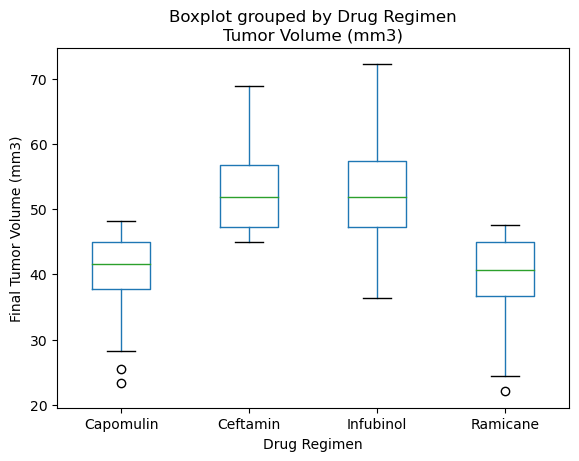

In [61]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.  Did not remove outliers because did not see in instructions.
volume = matching_df['Tumor Volume (mm3)']
drug = matching_df['Drug Regimen']
#fig1,ax1 = plt.subplots()
plt.figure(figsize=(8,8))
matching_df.boxplot(column='Tumor Volume (mm3)',by='Drug Regimen',grid=False)
#ax1.set_xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
#plt.show()

## Line and Scatter Plots

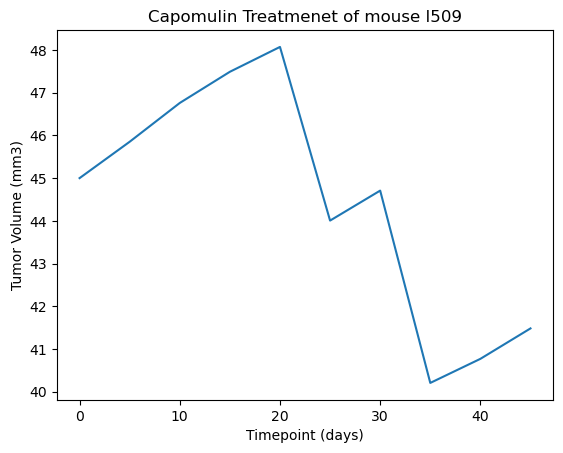

In [62]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
treat_med = 'Capomulin'
filtered_df = matching_df[matching_df['Drug Regimen'] == treat_med]
filtered_df
sorted_df = filtered_df.sort_values(by='Timepoint',ascending=True)
vals = 'l509'

#plt.show()
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatmenet of mouse l509")
result = sorted_df[sorted_df['Mouse ID'] == 'l509']
result
plt.plot(result['Timepoint'],result['Tumor Volume (mm3)'],linestyle = '-')
#filtered_df.plot(x='Timepoint',y='Tumor Volume (mm3)',linestyle ='-',label=f'Mouse ID ={vals}')
plt.show()

Text(0.5, 1.0, 'Scatter Plot Weight Vs Tumor Volume (mm3)')

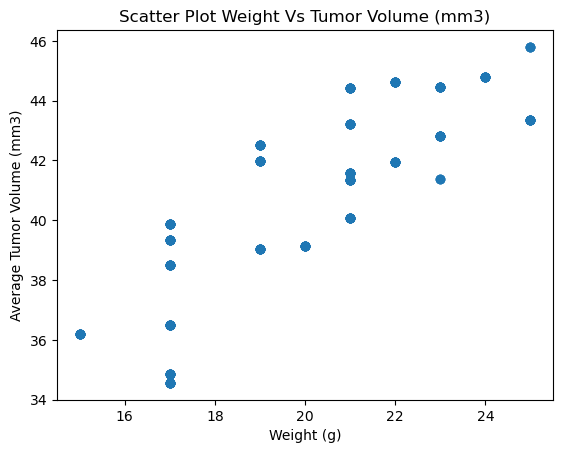

In [66]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_tumor = pd.DataFrame(columns=sorted_df.columns)   
avg_tumor = sorted_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor2 = pd.merge(sorted_df,avg_tumor, on = 'Mouse ID')
#avg_tumor = sorted_df
#avg_tumor = sorted_df[''].mean().reset_index(name="avg tumor")
avg_tumor2.columns
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(avg_tumor2['Weight (g)'],avg_tumor2['Tumor Volume (mm3)_y'])
plt.xlabel("Weight (g)")
plt.title("Scatter Plot Weight Vs Tumor Volume (mm3)")


## Correlation and Regression

The correlation between both factors is 0.83


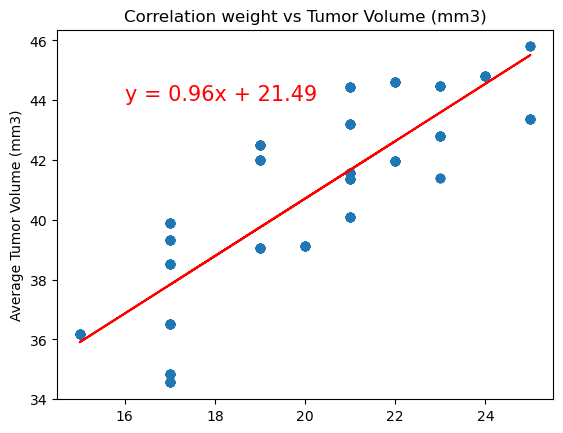

In [67]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#The correlation between mouse weight and the average tumor volume is 0.84
#coceff = avg_tumor2['Weight (g)'].corr(avg_tumor2['Tumor Volume (mm3)_y'])
x_values = avg_tumor2['Weight (g)'].astype(float)
y_values = avg_tumor2['Tumor Volume (mm3)_y']
#coeff = st.pearsonr(avg_tumor2['Weight (g)'],avg_tumor2['Tumor Volume (mm3)_y'])
coeff = st.pearsonr(x_values,y_values)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.scatter(avg_tumor2['Weight (g)'],avg_tumor2['Tumor Volume (mm3)_y'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.title("Correlation weight vs Tumor Volume (mm3)")
print(f"The correlation between both factors is {round(coeff[0],2)}")
plt.show()